In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv("bcwdata.csv", names = ["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]);

In [3]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data = data.drop(columns="Sample code number")
data.shape

(699, 10)

In [5]:
data.replace('?', -99999, inplace=True)

In [26]:
# X = np.array(data.drop(['Class'], 1))
X = data[['Bland Chromatin',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape']].values
y = np.array(data['Class'])

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(524, 4)
(175, 4)
(524,)
(175,)


### Logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0)
logmodel.fit(X_train, Y_train)

C:\Users\dellg7\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print(logmodel.score(X_test, Y_test))

0.9657142857142857


### L2 Ridge Regression

In [32]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean 

In [33]:
#L2
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, Y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 76.17786580472745
0.5 : 76.1779390657433
0.75 : 76.17801219125937
1.0 : 76.1780851814092
1.25 : 76.17815803632611
1.5 : 76.17823075614318
1.75 : 76.17830334099321
2.0 : 76.1783757910088


In [34]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, Y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, Y_test)) 

0.7889501133612719


### L1 Lasso Regression

In [35]:
#L1
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, Y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 


0.25 : 70.10639151157531
0.5 : 55.13696419377517
0.75 : 36.396855514900786
1.0 : 11.092723559459424
1.25 : -10.524090274598844
1.5 : -10.524090274598844
1.75 : -10.524090274598844
2.0 : -10.524090274598844


In [36]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, Y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, Y_test)) 

-0.0017895268017276145


### comparing and visualizing results

In [38]:
# Building the two lists for visualization 
models = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [logmodel.score(X_test, Y_test), 
         ridgeModelChosen.score(X_test, Y_test), 
         lassoModelChosen.score(X_test, Y_test)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Logistic Regreesion'] = logmodel.score(X_test, Y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, Y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, Y_test) 
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 


Logistic Regreesion : 0.9657142857142857
Ridge Regreesion : 0.7889501133612719
Lasso Regression : -0.0017895268017276145


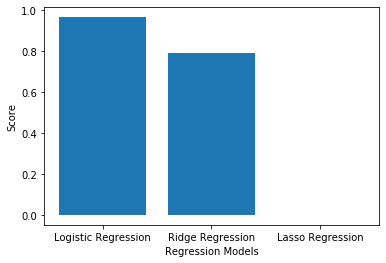

In [39]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show()